# Channel 3D with tLBM

The purpose of this notebook is to introduce in a step-by-step manner the Python code necessary to use tLBM.

The first step will be to put the tLBM python interface on the python path.

In [1]:
import sys
sys.path.insert(0,'/home/sblair/projects/tLBM/python/');

The problem that we will be considering will be the 3D channel flow with a spherical obstacle. I want to compare the output of this code from previously well-tested (let us just say: 'validated') output from a similar MATLAB script.  To this end, I will choose the problem parameters so as to match the problem solved by MATLAB so that I can validate the tLBM output.

## Problem Definition

### Geometry

Create a FluidChannel object called 'circChan' with the required dimensions and lattice point density so as to match the MATLAB calculations done thusfar.  The obstruction that you se will be a SphereObstruction object positioned, again, similarly to that in the corresponding MATLAB simulation.

In [2]:
import FluidChannel as fc

aLx_p = 1.0;
aLy_p = 1.0; 
aLz_p = 4.0;
aNdivs = 21;

circChan = fc.FluidChannel(Lx_p = aLx_p, Ly_p = aLy_p, Lz_p = aLz_p,
                          fluid = 'glycol', 
                           obst = fc.SphereObstruction(r = aLy_p/10., x_c = aLx_p/2.,
                                                   y_c = aLy_p/2., z_c = aLz_p/2.),
                          N_divs = aNdivs);

Creating channel with 4.0906e+06 lattice points.
Getting obstacle list
Generating channel solid boundaries


Write the geometry data out into a *mat* file that can later be read by the LBM processing code.

Also, do make a visual sanity check that you got the geometry correct, use the ` write_bc_vtk()` function to create a vtk file depicting the geometry - including the obstacle - and boundary conditions; ParaView (for example) can then be used to view the geometry.

The function `set_pRef_indx()` is a tool used to specify a lattice point that will be the *reference* value for pressure.  (Unlike typical CFD codes, it doesn't usually work well if you use a boundary node for this purpose)

In [3]:
circChan.write_mat_file('channel_circ_obst');
circChan.write_bc_vtk();

circChan.set_pRef_indx(aLx_p/2.0,aLy_p/2.0,0.96*aLz_p);

Creating boundary condition arrays
Writing boundary conditions to VTK files


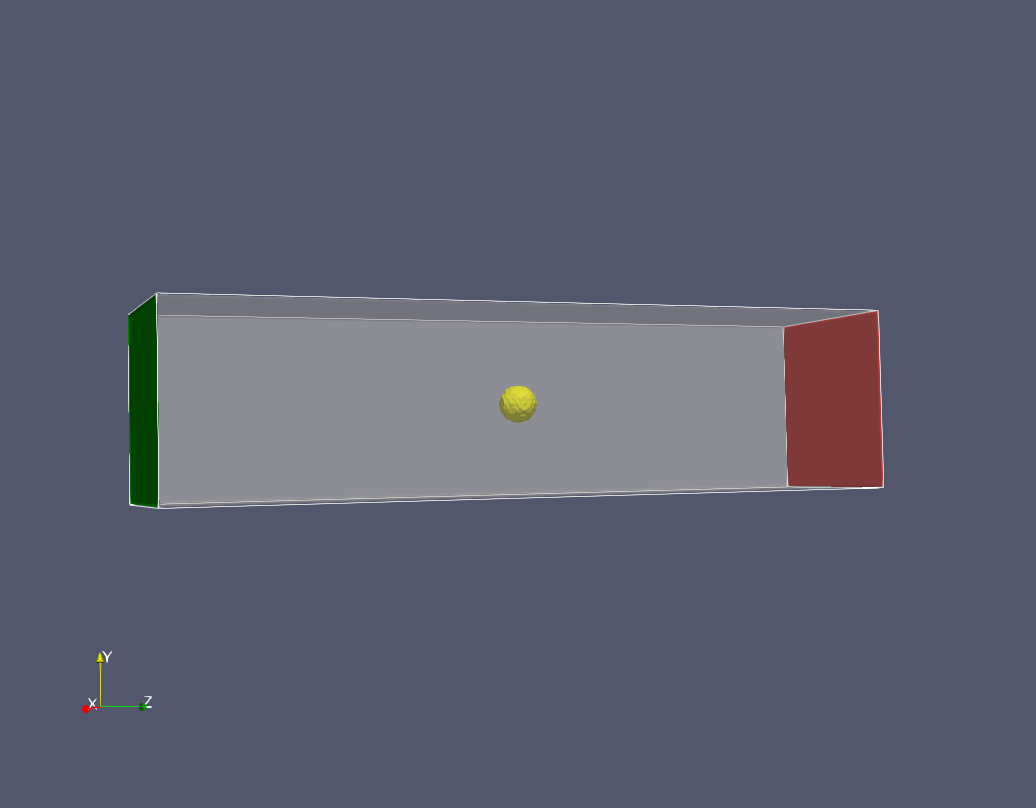

## Parameters and Partition Information
 For this we will use the script `tLBM_partition.py` 

In [4]:
mat_file = 'channel_circ_obst.mat'
lattice_type = 'D3Q19'  # D3Q15 | D3Q19 | D3Q27
dynamics = 1 # 1 = LBGK, 2 = RBGK, 3 = MRT
partitionMethod = 'metis' # 'metis' | (I forget the others - 1D or 3D geometric)
nParts = 18    # number of partitions
nOMP = 1     # number of OMP processes
bPreProcess=0 #boolean: should preprocessing be done?  If not, the *.lbm files for this problem should already exist
bRestart=0 # boolean: is this a restart? (if so, a restart.h5 file must be present)
bTimeAvg=0 # boolean: should the code compute time averaged macroscompic quantities?

numTs = 5000
tsRepFreq = 10
warmupTs = 0
plotFreq = 100
re = 5
dt = 2e-3
cs = 0
bSS = 0

In [5]:
!./tLBM_partition.py $mat_file \
$lattice_type $partitionMethod $nParts 

initializing the adjacency list
creating metis partition for 18 processes
cut size for metis partition = 1.00404e+06
writing metis partition to disk


In [6]:
!./tLBM_write_params.py $mat_file \
$lattice_type $dynamics $partitionMethod $nParts $numTs $tsRepFreq \
$warmupTs $plotFreq $re $dt $cs $bRestart $bTimeAvg $bSS

There are 4090601 nodes listed in ndType
Writing those to file
There are 0 nodes listed as subspace nodes
Writing those to file
l_conv_fact = 0.01.

p_conv_fact = 503.056.

Number of lattice points = 4090601.
Number of time-steps = 5000.
LBM viscosity = 0.16.
LBM relaxation parameter (omega) = 1.02041.
LBM flow Mach number = 0.04. 
Nx = 101
Ny = 101
Nz = 401
Ok! Cross your fingers!!


In [7]:
!mpirun -np $nParts ./tLBMexec

Commencing test with 18 processes
Executing time step: 10 
Executing time step: 20 
Executing time step: 30 
Executing time step: 40 
Executing time step: 50 
Executing time step: 60 
Executing time step: 70 
Executing time step: 80 
Executing time step: 90 
Executing time step: 100 
Executing time step: 110 
Executing time step: 120 
Executing time step: 130 
Executing time step: 140 
Executing time step: 150 
Executing time step: 160 
Executing time step: 170 
Executing time step: 180 
Executing time step: 190 
Executing time step: 200 
Executing time step: 210 
Executing time step: 220 
Executing time step: 230 
Executing time step: 240 
Executing time step: 250 
Executing time step: 260 
Executing time step: 270 
Executing time step: 280 
Executing time step: 290 
Executing time step: 300 
Executing time step: 310 
Executing time step: 320 
Executing time step: 330 
Executing time step: 340 
Executing time step: 350 
Executing time step: 360 
Executing time step: 370 
Executing tim

Executing time step: 3080 
Executing time step: 3090 
Executing time step: 3100 
Executing time step: 3110 
Executing time step: 3120 
Executing time step: 3130 
Executing time step: 3140 
Executing time step: 3150 
Executing time step: 3160 
Executing time step: 3170 
Executing time step: 3180 
Executing time step: 3190 
Executing time step: 3200 
Executing time step: 3210 
Executing time step: 3220 
Executing time step: 3230 
Executing time step: 3240 
Executing time step: 3250 
Executing time step: 3260 
Executing time step: 3270 
Executing time step: 3280 
Executing time step: 3290 
Executing time step: 3300 
Executing time step: 3310 
Executing time step: 3320 
Executing time step: 3330 
Executing time step: 3340 
Executing time step: 3350 
Executing time step: 3360 
Executing time step: 3370 
Executing time step: 3380 
Executing time step: 3390 
Executing time step: 3400 
Executing time step: 3410 
Executing time step: 3420 
Executing time step: 3430 
Executing time step: 3440 
E

In [8]:
!mpirun -np 1 ./processTLBM.py

Dimensions are (401, 101, 101)
Processing data dump # 0
Processing data dump # 1
Processing data dump # 2
Processing data dump # 3
Processing data dump # 4
Processing data dump # 5
Processing data dump # 6
Processing data dump # 7
Processing data dump # 8
Processing data dump # 9
Processing data dump # 10
Processing data dump # 11
Processing data dump # 12
Processing data dump # 13
Processing data dump # 14
Processing data dump # 15
Processing data dump # 16
Processing data dump # 17
Processing data dump # 18
Processing data dump # 19
Processing data dump # 20
Processing data dump # 21
Processing data dump # 22
Processing data dump # 23
Processing data dump # 24
Processing data dump # 25
Processing data dump # 26
Processing data dump # 27
Processing data dump # 28
Processing data dump # 29
Processing data dump # 30
Processing data dump # 31
Processing data dump # 32
Processing data dump # 33
Processing data dump # 34
Processing data dump # 35
Processing data dump # 36
Processing data d